In [51]:
import os
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
# DATA_PATH = ../data/a2/data
DATA_PATH = os.path.join("..", "data", "a2", "data")
TRAIN_PATH = os.path.join(DATA_PATH, "train")
TEST_PATH = os.path.join(DATA_PATH, "test")

In [53]:
FOLDERS = os.listdir(TRAIN_PATH)
FOLDERS

['bedroom',
 'Coast',
 'Forest',
 'Highway',
 'industrial',
 'Insidecity',
 'kitchen',
 'livingroom',
 'Mountain',
 'Office',
 'OpenCountry',
 'store',
 'Street',
 'Suburb',
 'TallBuilding']

In [54]:
import random

random.seed(42)

rand_imgs = [random.choice(os.listdir(os.path.join(TRAIN_PATH, folder))) for folder in FOLDERS]

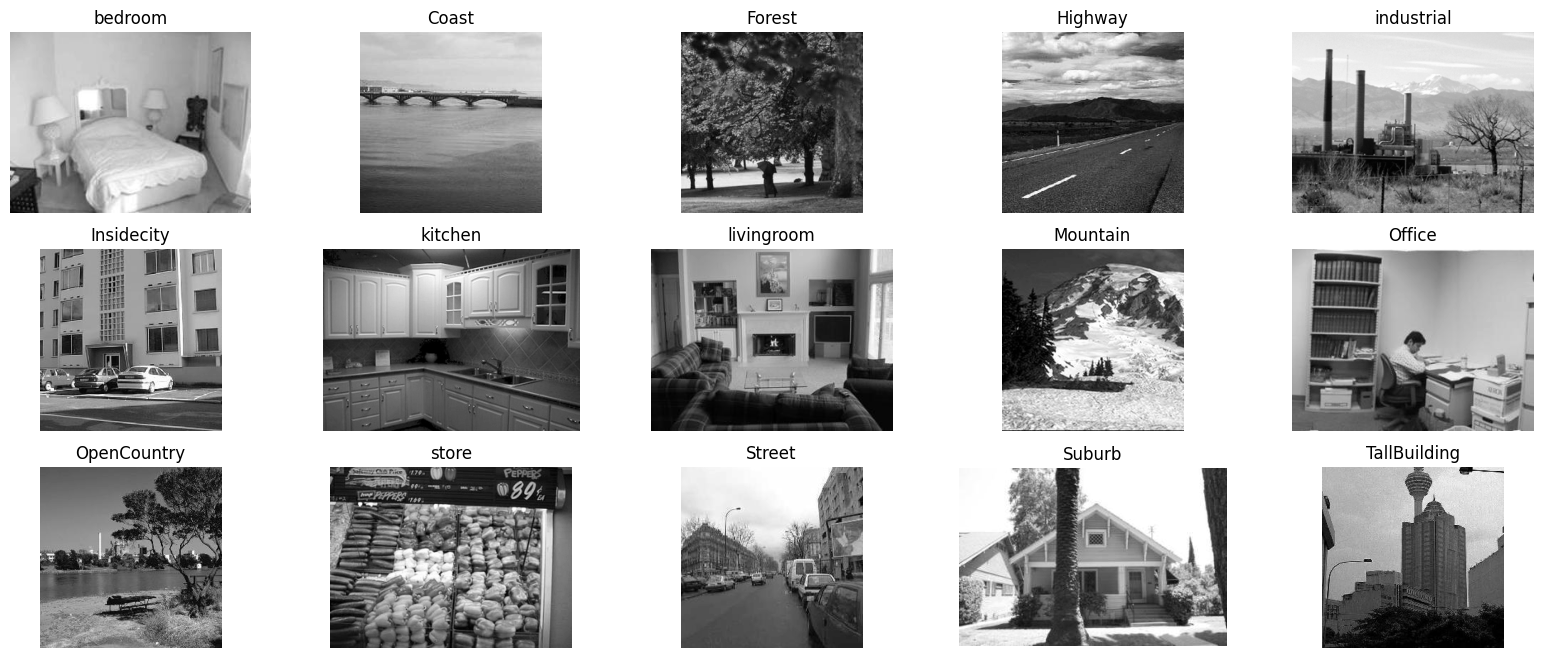

In [55]:
fig, axes = plt.subplots(3, 5, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    img = Image.open(os.path.join(TRAIN_PATH, FOLDERS[i], rand_imgs[i]))
    ax.imshow(img, cmap="gray")
    ax.set_title(FOLDERS[i])
    ax.axis("off")

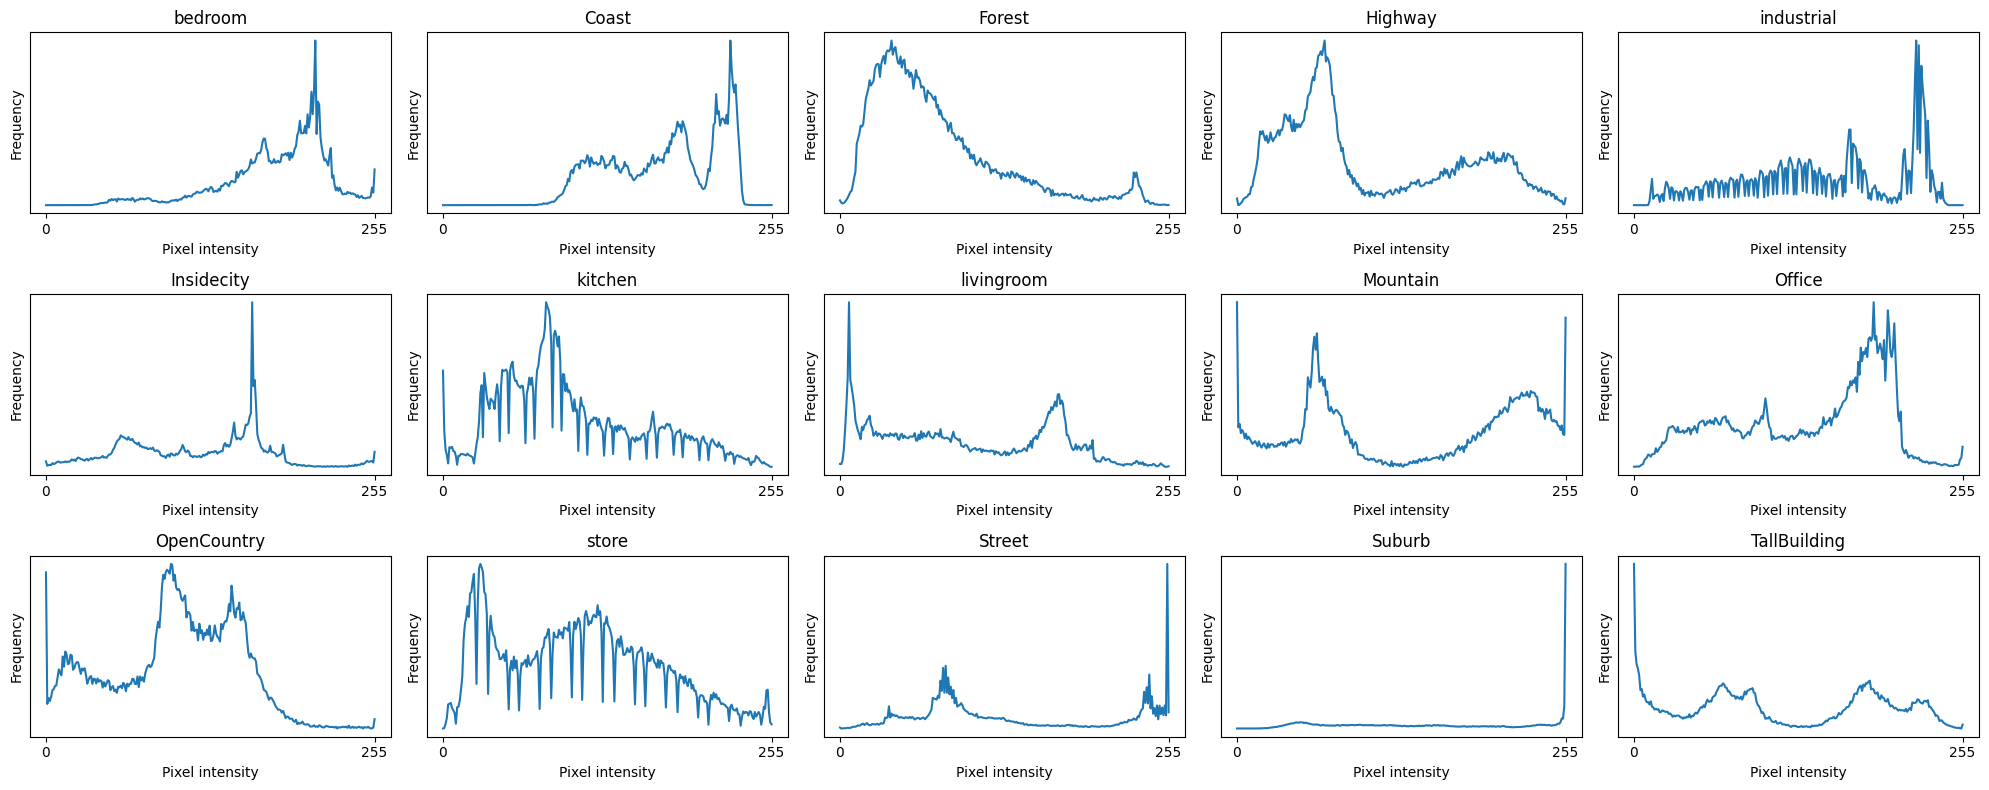

In [56]:
fig, axes = plt.subplots(3, 5, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    img = Image.open(os.path.join(TRAIN_PATH, FOLDERS[i], rand_imgs[i]))
    ax.plot(img.histogram())
    ax.set_title(FOLDERS[i])
    ax.set_xticks([0, 255])
    ax.set_yticks([])
    ax.set_xlabel("Pixel intensity")
    ax.set_ylabel("Frequency")
plt.tight_layout()

In [57]:
DATASET_METADA = {}

for folder in FOLDERS:
    folder_data = []
    for img in os.listdir(os.path.join(TRAIN_PATH, folder)):
        img_name = img
        img = Image.open(os.path.join(TRAIN_PATH, folder, img))
        img_size = img.size
        img_format = img.format
        img_mode = img.mode
        img_hist = img.histogram()
        folder_data.append(
            {
                "img_path": img_name,
                "img_size_x": img_size[0],
                "img_size_y": img_size[1],
                "img_format": img_format,
                "img_mode": img_mode,
                "img_hist": img_hist,
            }
        )
    DATASET_METADA[folder] = folder_data

In [58]:
dfs = []
for folder in FOLDERS:
    df = pd.DataFrame(DATASET_METADA[folder])
    df["label"] = folder
    dfs.append(df)

df = pd.concat(dfs)
df.reset_index(drop=True, inplace=True)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   img_path    1500 non-null   object
 1   img_size_x  1500 non-null   int64 
 2   img_size_y  1500 non-null   int64 
 3   img_format  1500 non-null   object
 4   img_mode    1500 non-null   object
 5   img_hist    1500 non-null   object
 6   label       1500 non-null   object
dtypes: int64(2), object(5)
memory usage: 82.2+ KB


,img_path,img_size_x,img_size_y,img_format,img_mode,img_hist,label
0,image_0001.jpg,267,200,JPEG,L,"[100, 85, 87, 33, 25, 51, 37, 54, 70, 86, 98, ...",bedroom
1,image_0002.jpg,257,200,JPEG,L,"[0, 0, 0, 0, 0, 0, 0, 2, 19, 22, 53, 77, 123, ...",bedroom
2,image_0005.jpg,246,200,JPEG,L,"[133, 290, 216, 190, 152, 159, 144, 149, 147, ...",bedroom
3,image_0009.jpg,267,200,JPEG,L,"[40, 83, 40, 60, 84, 37, 64, 77, 96, 89, 106, ...",bedroom
4,image_0010.jpg,220,286,JPEG,L,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 9, 120, 2...",bedroom


In [59]:
df.describe()

,img_size_x,img_size_y
count,1500.000000,1500.000000
mean,275.918000,242.810000
std,33.109446,23.357917
min,203.000000,200.000000
25%,256.000000,220.000000
50%,256.000000,256.000000
75%,293.000000,256.000000
max,411.000000,411.000000


In [60]:
# Create a dataframe with values of the img_hist column
hist_df = pd.DataFrame(df["img_hist"].values.tolist())
hist_df.columns = [f"bin_{i}" for i in range(hist_df.shape[1])]
hist_df["label"] = df["label"]
hist_df.info()
hist_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Columns: 257 entries, bin_0 to label
dtypes: int64(256), object(1)
memory usage: 2.9+ MB


,bin_0,bin_1,bin_2,bin_3,bin_4,bin_5,bin_6,bin_7,bin_8,bin_9,...,bin_247,bin_248,bin_249,bin_250,bin_251,bin_252,bin_253,bin_254,bin_255,label
0,100,85,87,33,25,51,37,54,70,86,...,36,62,56,55,193,5764,438,160,184,bedroom
1,0,0,0,0,0,0,0,2,19,22,...,194,199,240,203,180,207,194,47,5,bedroom
2,133,290,216,190,152,159,144,149,147,159,...,85,77,87,79,83,110,167,245,744,bedroom
3,40,83,40,60,84,37,64,77,96,89,...,49,51,55,88,86,127,217,392,785,bedroom
4,0,0,0,0,0,0,0,0,0,0,...,189,192,154,97,85,20,60,123,542,bedroom


In [61]:
hist_df.describe()

,bin_0,bin_1,bin_2,bin_3,bin_4,bin_5,bin_6,bin_7,bin_8,bin_9,...,bin_246,bin_247,bin_248,bin_249,bin_250,bin_251,bin_252,bin_253,bin_254,bin_255
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,...,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,150.266000,77.446000,102.786667,100.732000,129.124667,129.401333,134.201333,144.296667,149.880000,169.088667,...,116.390667,145.175333,142.284667,115.980667,152.322000,123.540667,133.931333,129.797333,315.368000,554.192000
std,445.789998,264.020248,466.677492,253.091717,541.888092,348.021309,279.617187,313.598185,267.229419,349.468443,...,304.811712,729.202590,683.789175,316.669365,862.236887,423.047712,477.186045,296.469511,1107.152945,1857.773331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,1.000000,2.000000,3.000000,4.000000,6.000000,8.000000,11.000000,...,4.000000,3.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000
50%,14.000000,8.000000,13.000000,18.000000,25.000000,32.000000,37.000000,44.000000,52.500000,60.000000,...,32.000000,30.000000,27.000000,27.000000,27.000000,24.000000,20.000000,19.000000,16.000000,41.000000
75%,100.250000,52.250000,75.000000,96.000000,110.000000,121.000000,138.000000,150.000000,169.250000,183.000000,...,113.000000,112.250000,115.000000,114.000000,111.250000,111.000000,116.000000,125.000000,147.000000,298.000000
max,7507.000000,4897.000000,10915.000000,3254.000000,16643.000000,7208.000000,3383.000000,5738.000000,3290.000000,5624.000000,...,6523.000000,20010.000000,17658.000000,5119.000000,22150.000000,11776.000000,13655.000000,3889.000000,13702.000000,23955.000000


In [62]:
df_mean = hist_df.groupby("label").mean()
df_mean

,bin_0,bin_1,bin_2,bin_3,bin_4,bin_5,bin_6,bin_7,bin_8,bin_9,...,bin_246,bin_247,bin_248,bin_249,bin_250,bin_251,bin_252,bin_253,bin_254,bin_255
label,,,,,,,,,,,,,,,,,,,,,
Coast,86.25,35.00,73.12,83.04,350.45,183.69,168.30,197.60,158.76,194.99,...,77.30,200.74,92.13,76.70,66.93,64.55,55.90,57.01,58.60,142.16
Forest,436.53,117.38,248.19,171.05,181.62,232.63,198.85,205.40,207.81,222.90,...,83.07,85.22,94.86,86.75,111.50,77.17,73.21,83.63,84.13,363.31
Highway,54.48,15.03,16.65,18.74,20.77,22.07,24.89,28.60,31.79,36.45,...,64.83,69.47,146.85,74.17,42.06,62.11,38.24,31.77,28.99,25.04
Insidecity,248.48,97.43,135.98,142.05,136.52,146.47,163.09,170.20,175.28,179.83,...,68.25,56.75,55.18,52.35,200.93,44.84,47.43,43.73,154.58,208.21
Mountain,198.00,106.70,201.27,120.86,120.89,129.96,179.28,176.40,165.36,198.67,...,74.39,72.29,75.68,82.73,88.23,86.35,92.34,111.18,205.53,893.33
Office,54.15,22.00,39.06,62.83,110.47,149.66,184.67,235.44,271.96,296.15,...,262.75,238.12,66.31,45.12,35.39,30.33,31.76,32.59,37.97,97.65
OpenCountry,192.76,50.90,64.49,74.89,92.60,87.54,97.94,112.72,121.84,127.83,...,107.05,138.43,400.52,108.66,113.98,120.71,89.95,91.76,169.83,339.06
Street,104.82,29.86,36.43,47.57,69.78,90.36,97.16,107.41,101.50,108.94,...,106.00,102.07,114.96,206.91,476.56,263.86,162.87,158.88,2101.02,438.85
Suburb,44.85,47.18,60.65,77.22,89.31,102.30,115.41,127.55,140.38,152.98,...,239.42,262.78,284.98,308.42,277.20,367.12,404.75,376.23,628.60,2875.37


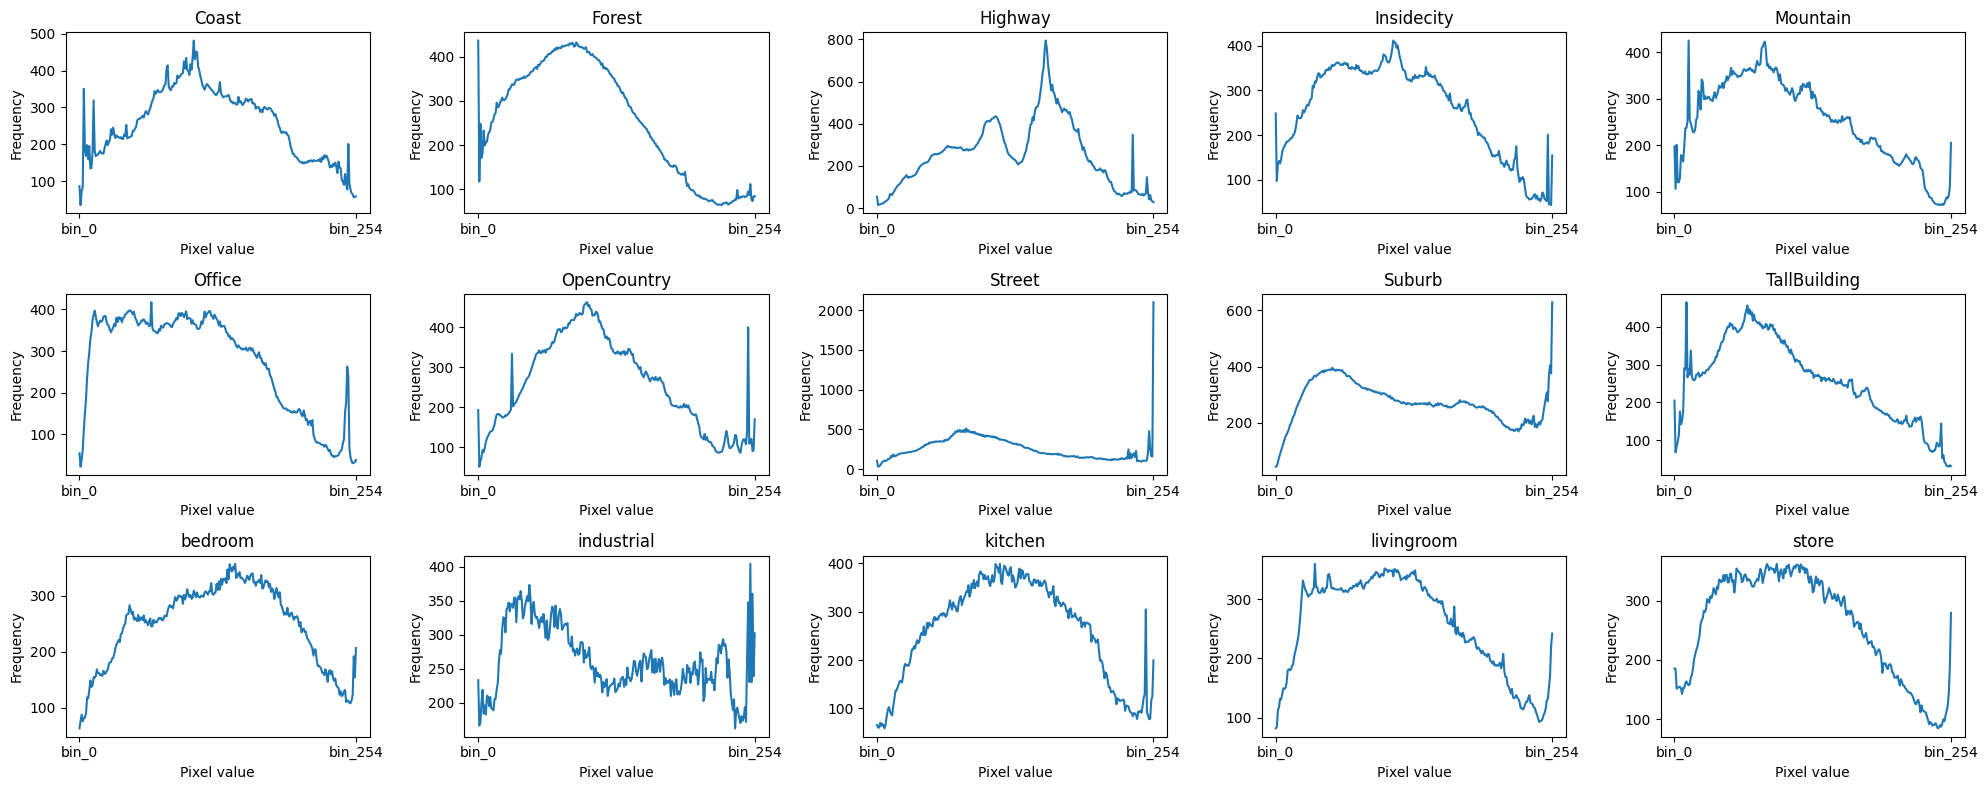

In [63]:
fig, axes = plt.subplots(3, 5, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    ax.plot(df_mean.iloc[i, :-1])
    ax.set_title(df_mean.index[i])
    ax.set_xticks([0, 254])
    ax.set_xlabel("Pixel value")
    ax.set_ylabel("Frequency")

plt.tight_layout()

<Axes: xlabel='img_size_x', ylabel='img_size_y'>

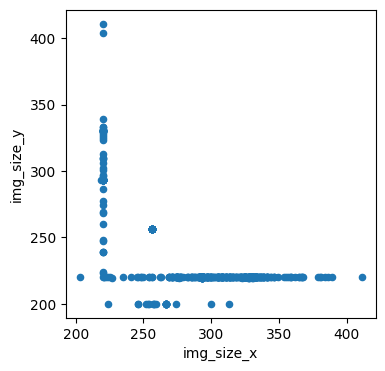

In [64]:
df.plot(kind="scatter", x="img_size_x", y="img_size_y", figsize=(4, 4))

array([[<Axes: title={'center': 'img_size_x'}>,
        <Axes: title={'center': 'img_size_y'}>]], dtype=object)

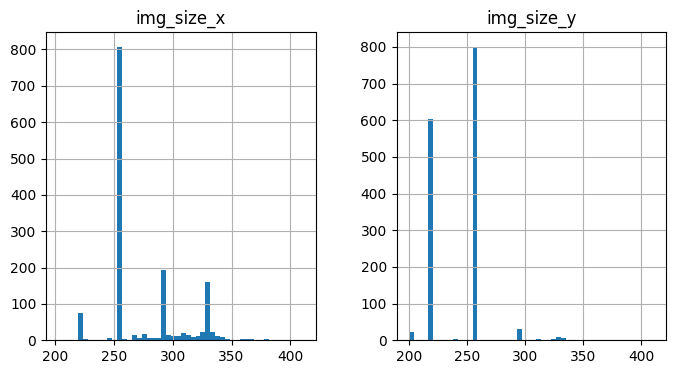

In [65]:
df.hist(bins=50, figsize=(8, 4))

In [66]:
ROLL_WIN = len(df) // 10
ROLL_WIN

150

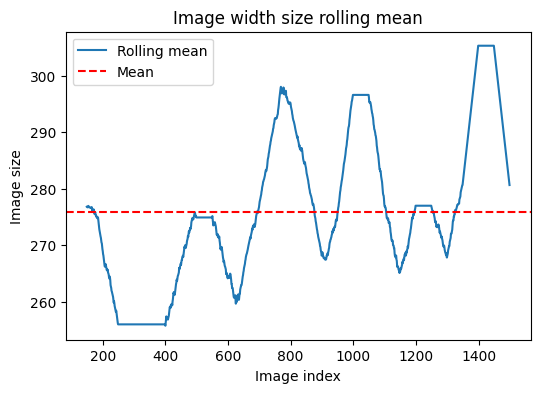

In [67]:
# Plot the rolling mean of the image size with the mean
df["img_size_x"].rolling(ROLL_WIN).mean().plot(figsize=(6, 4))
plt.axhline(df["img_size_x"].mean(), color="r", linestyle="--")
plt.title("Image width size rolling mean")
plt.ylabel("Image size")
plt.xlabel("Image index")
plt.legend(["Rolling mean", "Mean"])

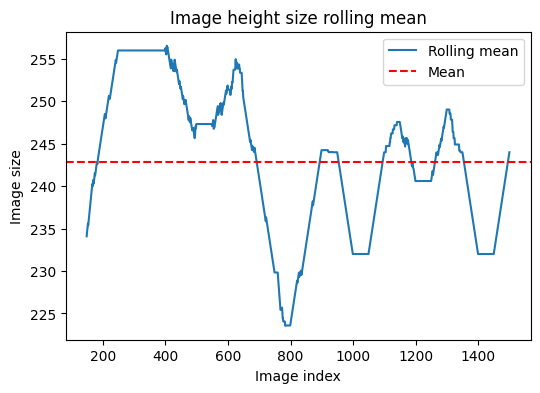

In [68]:
df["img_size_y"].rolling(ROLL_WIN).mean().plot(figsize=(6, 4))
plt.axhline(df["img_size_y"].mean(), color="r", linestyle="--")
plt.title("Image height size rolling mean")
plt.ylabel("Image size")
plt.xlabel("Image index")
plt.legend(["Rolling mean", "Mean"])

Text(0.5, 0, 'Label')

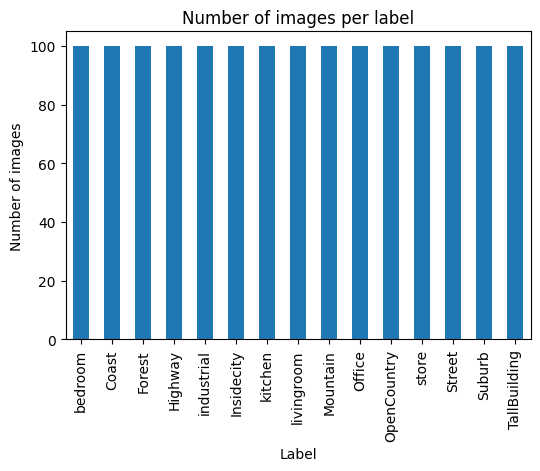

In [69]:
df["label"].value_counts().plot(kind="bar", figsize=(6, 4))
plt.title("Number of images per label")
plt.ylabel("Number of images")
plt.xlabel("Label")

<Axes: xlabel='label'>

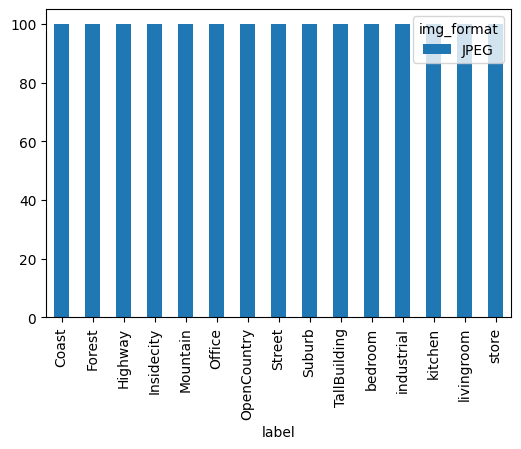

In [70]:
# Check the img format for each label
df.groupby("label")["img_format"].value_counts().unstack().plot(kind="bar", figsize=(6, 4))

<Axes: xlabel='label'>

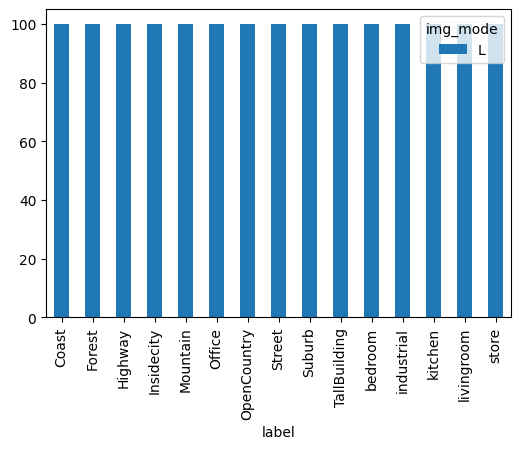

In [71]:
df.groupby("label")["img_mode"].value_counts().unstack().plot(kind="bar", figsize=(6, 4))